In [1]:
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt

from lqg.tracking import BoundedActor

In [2]:
model = BoundedActor(c=100., motor_noise=0.5, sigma=6., prop_noise=2.)

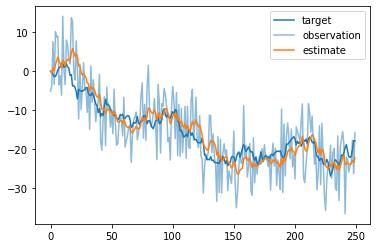

In [3]:
x, xhat, y, u = model.simulate(rng_key=random.PRNGKey(0), n=20, T=250, return_all=True)

plt.plot(x[:,0,0], label="target")
plt.plot(y[:,0,0], label="observation", alpha=0.5, color="C0")
plt.plot(xhat[:,0,0], label="estimate")
plt.legend()

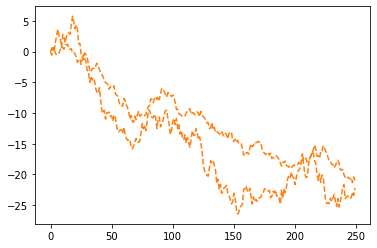

In [4]:
plt.plot(xhat[:,0,0], color="C1", linestyle="--")
plt.plot(xhat[:,0,1], color="C1", linestyle="--")


Text(0.5, 1.0, 'Log likelihood')

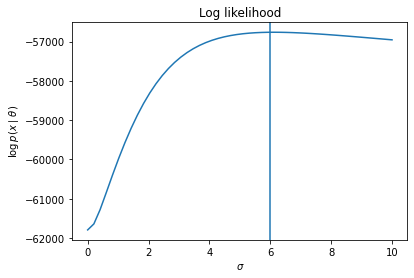

In [5]:
x = BoundedActor(sigma=6., c=0.5, motor_noise=0.5, prop_noise=1.).simulate(random.PRNGKey(1), n=50, T=500)

sigmas = jnp.linspace(0., 10.)

likelihood = lambda sigma: BoundedActor(sigma=sigma, c=0.5, motor_noise=0.5, prop_noise=1.).log_likelihood(x).sum()

plt.plot(sigmas, vmap(likelihood)(sigmas))
plt.axvline(6.)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\log p(x \mid \theta)$")
plt.title("Log likelihood")

In [13]:
BoundedActor(sigma=6., c=0.5, motor_noise=0.5, prop_noise=1.).log_likelihood(x)

DeviceArray([[-2.463951 , -4.6245995, -1.5278294, ..., -1.4545012,
              -2.9957452, -1.7643632],
             [-3.2430208, -1.9456458, -1.7557125, ..., -1.2724919,
              -1.3194758, -1.5637906],
             [-2.8087823, -1.5964625, -1.5962796, ..., -1.4907287,
              -1.6992126, -1.4575825],
             ...,
             [-2.640994 , -1.5324988, -1.398967 , ..., -2.2130513,
              -1.9198895, -1.6727471],
             [-2.740262 , -2.995096 , -1.6979401, ..., -1.3981564,
              -2.7804835, -3.6286743],
             [-1.9908712, -2.3279586, -2.151939 , ..., -2.7171943,
              -1.4045045, -2.364378 ]], dtype=float32)